For examining post processed results of synthesized FA models

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pathlib

import matplotlib.pyplot as plt
import torch

from probabilistic_model_synthesis.gaussian_nonlinear_dim_reduction import Fitter

In [3]:
%matplotlib notebook

## Parameters go here

In [19]:
ps = dir()

# Directory holding results
pp_dir = r'/groups/bishop/bishoplab/projects/probabilistic_model_synthesis/results/real_data/gnldr/same_cond_transfer_analysis/v2/fold_str_base_14_tgt_1/fold_0/subj_8/comb'
pp_file = r'pp_test_results.pt'

# Specify the fit type we want to look at 
mdl_type = 'sp'


## Load post processed results

In [20]:
pp_rs = torch.load(pathlib.Path(pp_dir) / pp_file)
latents = pp_rs[mdl_type]['latents']
cp_results = pp_rs[mdl_type]['cp_results']
elbo_vls = pp_rs[mdl_type]['elbo_vls']
period_elbo_vls = pp_rs[mdl_type]['period_elbo_vls']

subject_order = pp_rs['subject_order']

## Look at fitting logs

<IPython.core.display.Javascript object>


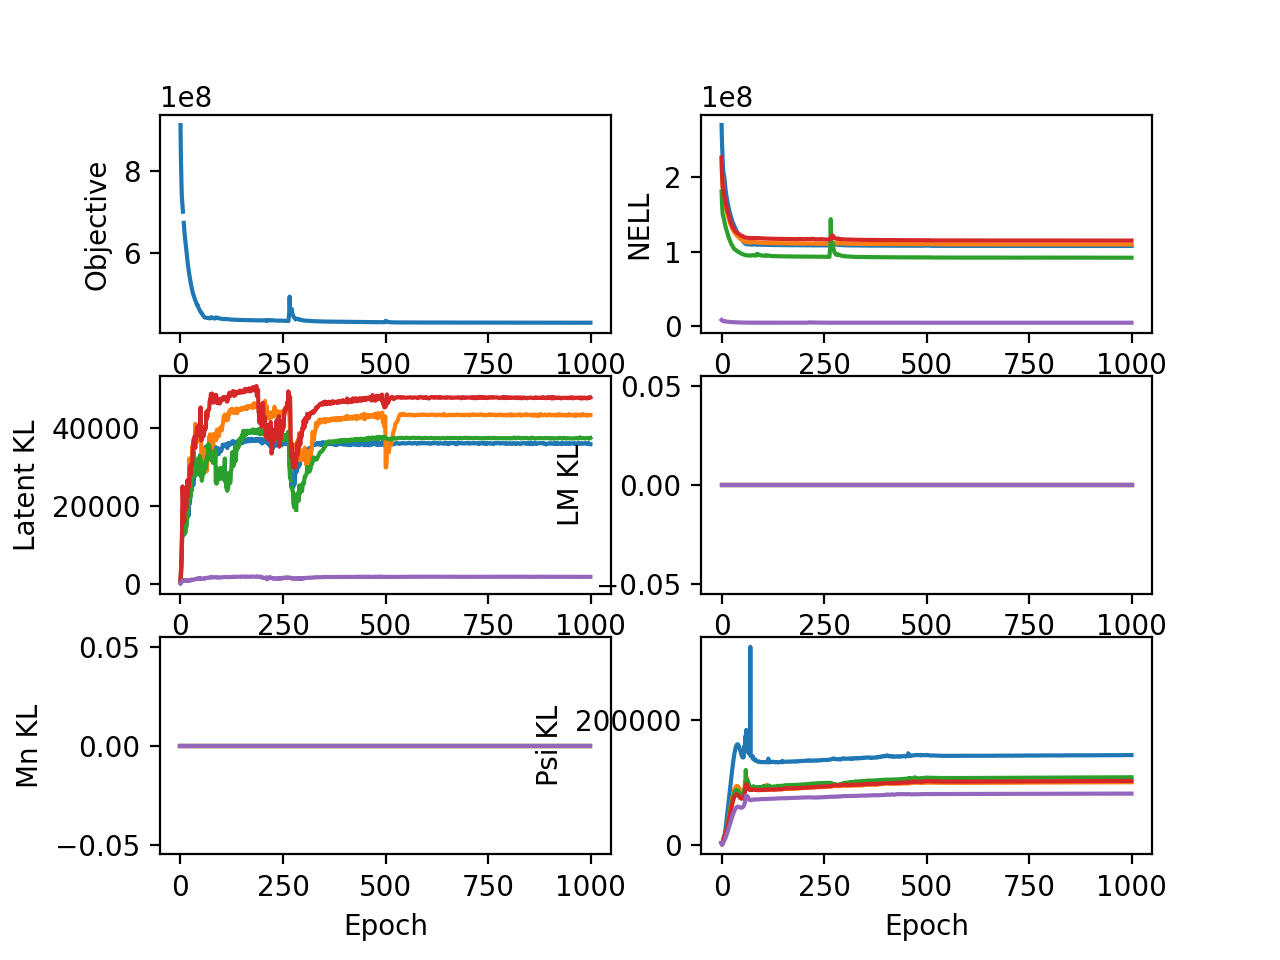

In [21]:
for log in pp_rs[mdl_type]['logs']:
    Fitter.plot_log(log)

## Look at a log for latent estimation

<IPython.core.display.Javascript object>


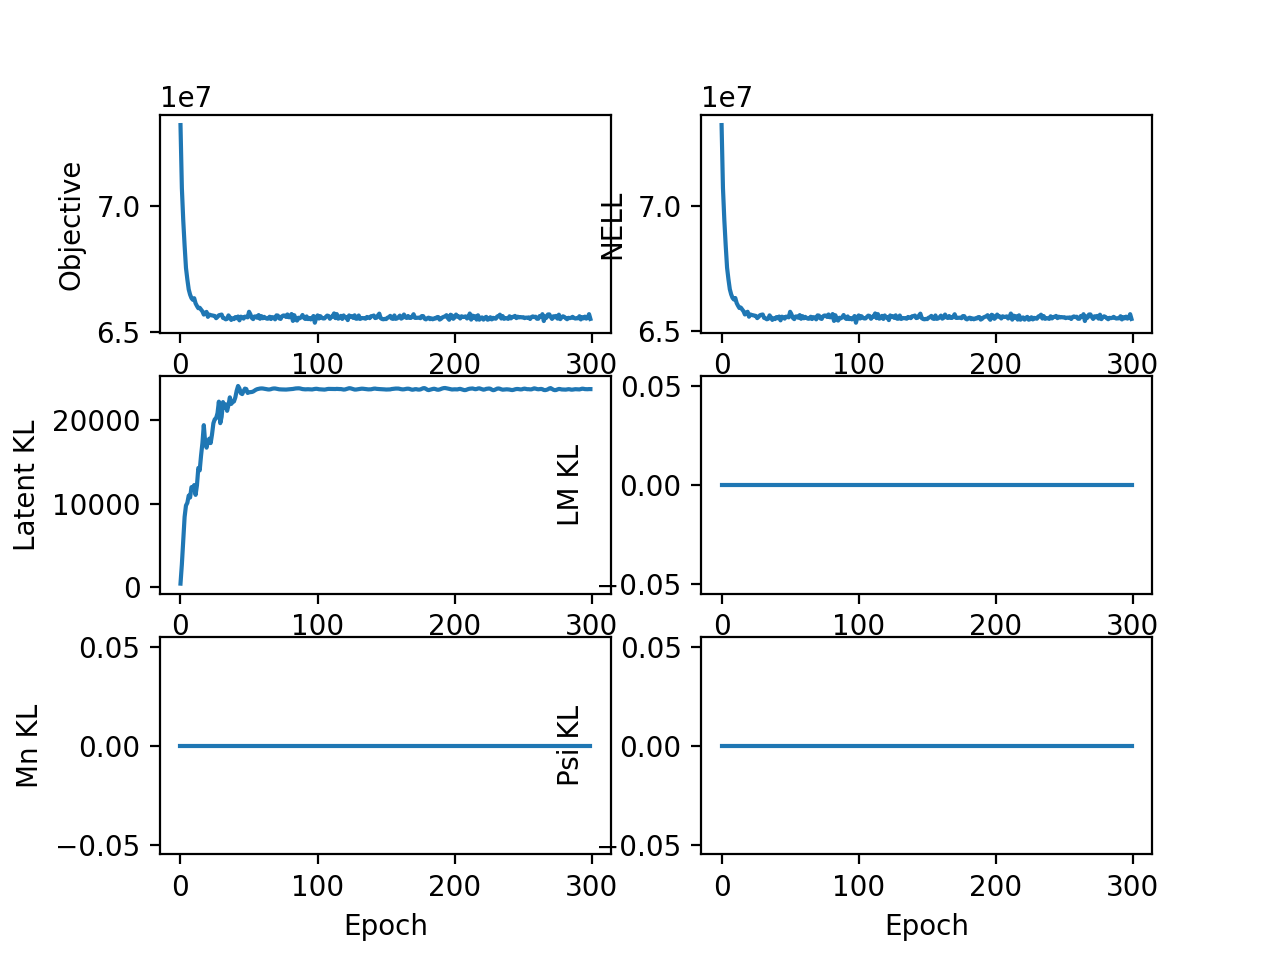

In [22]:
latent_log = latents[8]['test']['log']
Fitter.plot_log(latent_log)

## Look at a log for the latent estimation for check point evaluation 

<IPython.core.display.Javascript object>


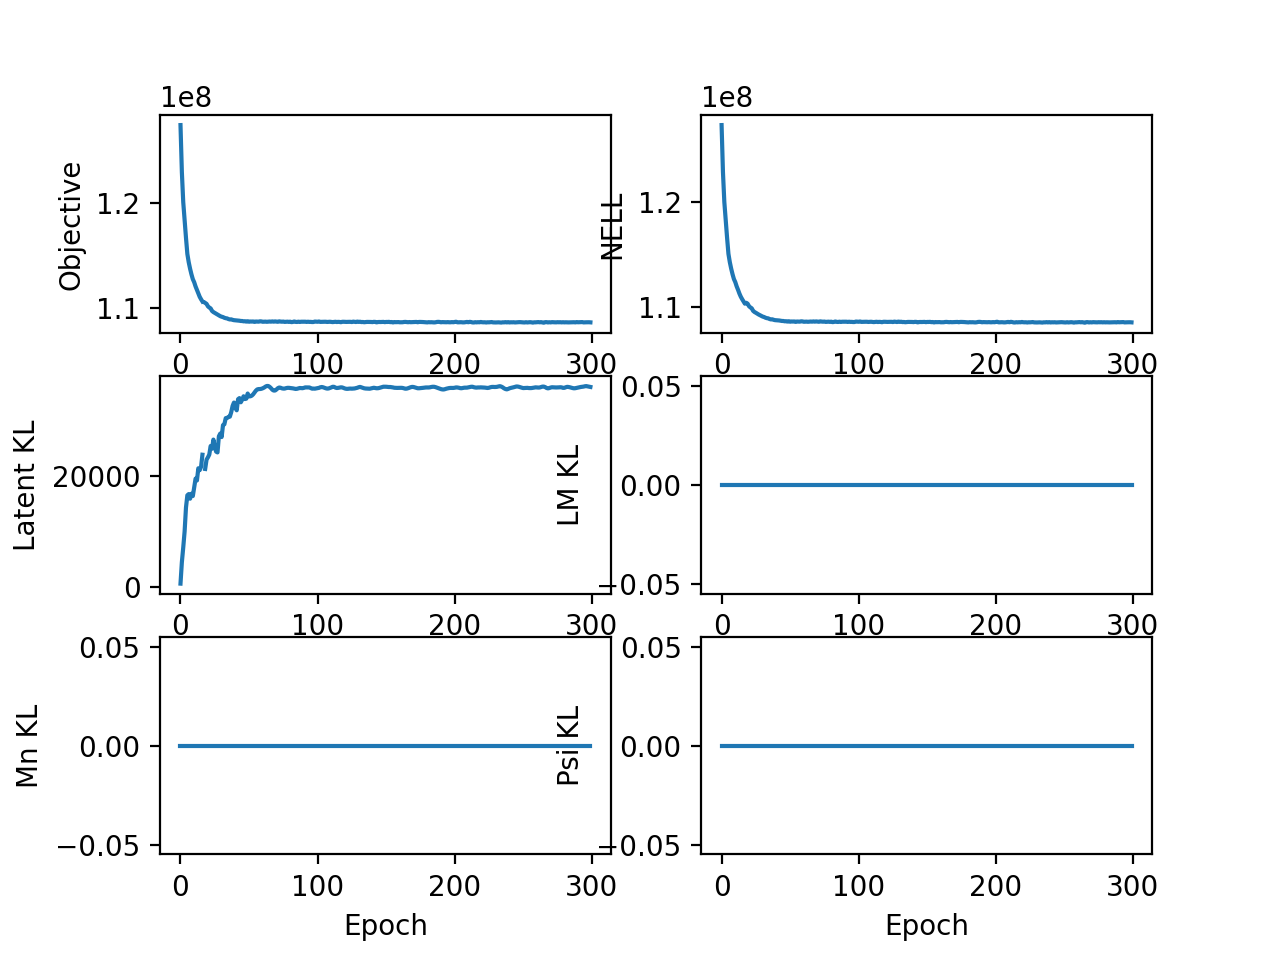

In [23]:
cp_log = cp_results['cp_logs']['test'][8][0]
Fitter.plot_log(cp_log)

## Look at performance across check points

In [24]:
cp_epochs = cp_results['epochs']
elbo_perf = cp_results['cp_perf']['validation']

<IPython.core.display.Javascript object>


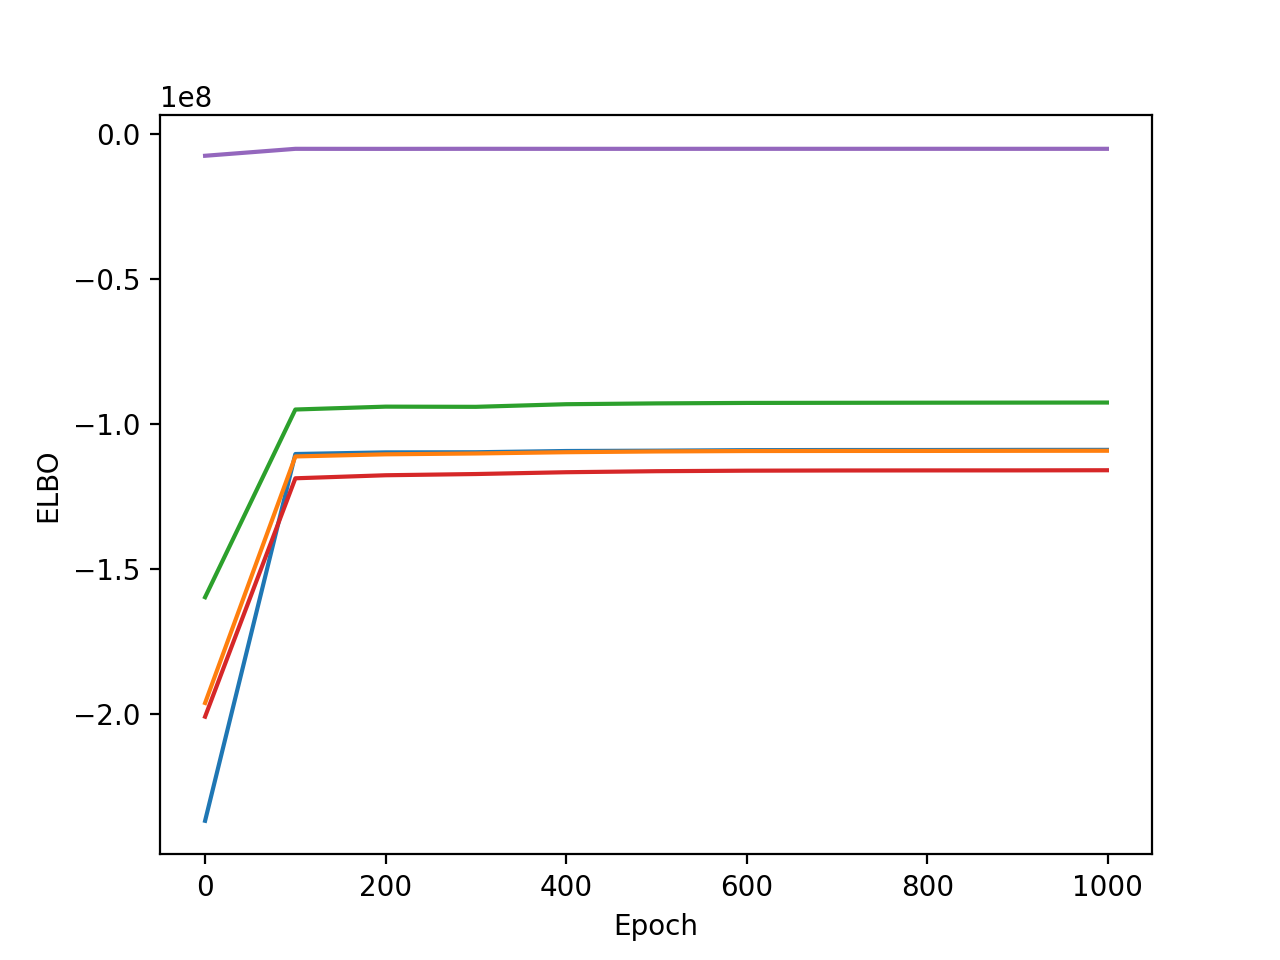

Text(0, 0.5, 'ELBO')

In [25]:
plt.figure()
_, plt.plot(cp_epochs, elbo_perf)
plt.xlabel('Epoch')
plt.ylabel('ELBO')

## Look at ELBO values on test data for each model using the check point picked with early stopping

In [11]:
for s_n in subject_order:
    print('**** Subject ' + str(s_n) +  ' ****')
    if elbo_vls[s_n]['test'] is not None:
        print('ELBO: ' + '{:.2E}'.format(elbo_vls[s_n]['test']['elbo'].item()))
        print('ELL: ' + '{:.2E}'.format(elbo_vls[s_n]['test']['ell'].item()))
    else:
        print('None')

**** Subject 1 ****
ELBO: -1.07E+08
ELL: -1.06E+08
**** Subject 2 ****
ELBO: -1.10E+08
ELL: -1.10E+08
**** Subject 5 ****
ELBO: -9.13E+07
ELL: -9.10E+07
**** Subject 6 ****
ELBO: -1.14E+08
ELL: -1.13E+08
**** Subject 8 ****
ELBO: -6.57E+07
ELL: -6.55E+07


## Look at ELBO values on test data for each model using the check point picked with early stopping by period

In [12]:
for s_n in subject_order:
    print('**** Subject ' + str(s_n) +  ' ****')
    if period_elbo_vls[s_n] is not None: 
        for period in period_elbo_vls[s_n].keys():
            if period_elbo_vls[s_n][period] is not None:
                print('Period: ' + period + ', ELBO: ' + '{:.2E}'.format(period_elbo_vls[s_n][period]['elbo'].item()) + 
                     ', ELL: ' + '{:.2E}'.format(period_elbo_vls[s_n][period]['ell'].item()))
    else:
        print('None')

**** Subject 1 ****
Period: phototaxis_left, ELBO: -2.68E+07, ELL: -2.63E+07
Period: phototaxis_right, ELBO: -2.31E+07, ELL: -2.26E+07
**** Subject 2 ****
Period: phototaxis_left, ELBO: -1.20E+07, ELL: -1.16E+07
Period: phototaxis_right, ELBO: -1.55E+07, ELL: -1.51E+07
**** Subject 5 ****
Period: phototaxis_left, ELBO: -2.60E+07, ELL: -2.56E+07
Period: phototaxis_right, ELBO: -2.37E+07, ELL: -2.33E+07
**** Subject 6 ****
Period: phototaxis_left, ELBO: -3.41E+07, ELL: -3.37E+07
Period: phototaxis_right, ELBO: -3.07E+07, ELL: -3.03E+07
**** Subject 8 ****
Period: phototaxis_left, ELBO: -2.26E+07, ELL: -2.24E+07
Period: phototaxis_right, ELBO: -1.89E+07, ELL: -1.88E+07


## Debug code goes here

In [ ]:
pp_rs['fit_ps']